# Creative Gaming: Propensity-to-Buy Modeling

* Team-lead GitHub userid: rsm-s1khemka
* Group name: Group 24
* Team member names:
    - Sanskriti Khemka
    - Panchami Shanbhag 
    - Akhil Reddy Lavanur,
    - Sai Sreekar Nelakonda

## Setup

Please complete this python notebook with your group by answering the questions in `cg-prop-to-buy.pdf`. Create a Notebook with all your results and comments and push both the Notebook to GitHugLab when your team is done.

Create a Notebook with all your results and comments and push both the Notebook to GitHub when your team is done. Before the deadline, make sure to connect the GitHub repo to GradeScope. All results MUST be reproducible (i.e., the TA and I must be able to recreate your output from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the RSM-MSBA docker container.

> Note: Please do not install any packages as part of your Jupyter Notebook submission

This is the secone group assignment for MGTA 455 and you will be using Git and GitHub. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's changes to accept. The team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitHub. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `question1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file
* If you are going to work simultaneously, do it in different notebooks, e.g.,
    - question1.ipynb, question2.ipynb, question3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/github-group-workflow.png)

In [366]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyrsm as rsm
import numpy as np
from sklearn import metrics
from utils import functions
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier


# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [367]:
rsm.__version__

'0.9.17'

In [368]:
## loading the data - this dataset must NOT be changed
cg_organic = pd.read_parquet("data/cg_organic.parquet")
rsm.md("data/cg_organic_description.md")

## Creative gaming

Game telemetry dataset used for the Creative Gaming: Propensity-to-Buy Modeling case

#### Feature descriptions

* converted: Purchased the Zalon campain ("yes" or "no")
* GameLevel: Highest level of game achieved by the user
* NumGameDays: Number of days user played the game in last month (with or without network connection)
* NumGameDays4Plus: Number of days user played the game in last month with 4 or more total users (this implies using a network connection)
* NumInGameMessagesSent: Number of in-game messages sent to friends
* NumFriends: Number of friends to which the user is connected (necessary to crew together in multiplayer mode) 
* NumFriendRequestIgnored: Number of friend requests this user has not replied to since game inception
* NumSpaceHeroBadges: Number of "Space Hero" badges, the highest distinction for gameplay in Space Pirates
* AcquiredSpaceship: Flag if the user owns a spaceship, i.e., does not have to crew on another user's or NPC's space ship ("no" or "yes")
* AcquiredIonWeapon: Flag if the user owns the powerful "ion weapon" ("no" or "yes")
* TimesLostSpaceship: The number of times the user destroyed his/her spaceship during gameplay. Spaceships need to be re-acquired if destroyed.
* TimesKilled: Number of times the user was killed during gameplay
* TimesCaptain: Number of times in last month that the user played in the role of a captain
* TimesNavigator: Number of times in last month that the user played in the role of a navigator
* PurchasedCoinPackSmall: Flag if the user purchased a small pack of Zathium in last month ("no" or "yes")
* PurchasedCoinPackLarge: Flag if the user purchased a large pack of Zathium in last month ("no" or "yes")
* NumAdsClicked: Number of in-app ads the user has clicked on
* DaysUser: Number of days since user established a user ID with Creative Gaming (for Space Pirates or previous games)
* UserConsole: Flag if the user plays Creative Gaming games on a console ("no" or "yes")
* UserHasOldOS: Flag if the user has iOS version 10 or earlier ("no" or "yes")
* training: Dummy variable that splits the dataset into a training (1) and test (0) dataset


In [369]:
# run python code from another notebook
#%run ./sub-notebooks/question1.ipynb

In [370]:
# load a custom python module
from utils.functions import example
example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



In [371]:
## Question answers
cg_organic.head()

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,training
34184,no,10,11,0,355,0,8,3,yes,no,...,0,5,0,no,no,4,2953,yes,yes,1
192849,no,6,7,1,30,0,0,0,yes,no,...,0,0,0,no,yes,8,2343,yes,no,1
84958,no,8,2,0,69,0,111,13,no,no,...,0,0,0,yes,no,11,2374,yes,no,1
120745,no,5,3,0,40,0,33,1,no,no,...,0,2,0,no,no,3,2708,yes,no,1
137887,no,6,15,0,5,0,62,0,no,no,...,0,0,0,no,no,11,2101,yes,yes,0


In [372]:
cg_organic.shape

(30000, 21)

In [373]:
cg_organic[cg_organic['training'] == 1].shape

(21000, 21)

In [374]:
cg_organic[cg_organic['training'] == 0].shape

(9000, 21)

In [375]:
cg_organic.dtypes

converted                  category
GameLevel                     int32
NumGameDays                   int32
NumGameDays4Plus              int32
NumInGameMessagesSent         int32
NumSpaceHeroBadges            int32
NumFriendRequestIgnored       int32
NumFriends                    int32
AcquiredSpaceship          category
AcquiredIonWeapon          category
TimesLostSpaceship            int32
TimesKilled                   int32
TimesCaptain                  int32
TimesNavigator                int32
PurchasedCoinPackSmall     category
PurchasedCoinPackLarge     category
NumAdsClicked                 int32
DaysUser                      int32
UserConsole                category
UserHasOldOS               category
training                      int32
dtype: object

## Part I: Exploratory Analytics

In [376]:
#1
organic_conversion = (cg_organic[cg_organic['converted'] == 'yes'].shape[0]) / (cg_organic.shape[0])
organic_conversion

0.05753333333333333

In [377]:
def generate_summary_statistics(df):
    # Numeric DataFrame 
    numeric_columns = df.select_dtypes(include=['int32']) 
    numeric_summary = pd.DataFrame({
        'Column Name': numeric_columns.columns,
        'Number of Observations': numeric_columns.count(),
        'Number of Missing Values': numeric_columns.isnull().sum(),
        'Number of Distinct Values': numeric_columns.nunique(),
        'Mean': numeric_columns.mean(),
        'Min': numeric_columns.min(),
        'Max': numeric_columns.max(),
        'Standard Deviation': numeric_columns.std()
    }).reset_index(drop=True)

    # Non-Numeric DataFrame 
    non_numeric_columns = df.select_dtypes(include=['category'])  
    non_numeric_summary_list = []
    for column in non_numeric_columns.columns:
        non_numeric_summary_list.append({
            'Column Name': column,
            'Number of Observations': non_numeric_columns[column].count(),
            'Number of Missing Values': non_numeric_columns[column].isnull().sum(),
            'Number of Distinct Values': non_numeric_columns[column].nunique(),
            'Most Common Level': non_numeric_columns[column].value_counts().idxmax(),
            'Least Common Level': non_numeric_columns[column].value_counts().idxmin()
        })
    non_numeric_summary = pd.DataFrame(non_numeric_summary_list).reset_index(drop=True)

    return numeric_summary, non_numeric_summary

numeric_summary_df, non_numeric_summary_df = generate_summary_statistics(cg_organic)
print("Numeric Summary DataFrame:\n", numeric_summary_df)


Numeric Summary DataFrame:
                 Column Name  Number of Observations  Number of Missing Values  \
0                 GameLevel                   30000                         0   
1               NumGameDays                   30000                         0   
2          NumGameDays4Plus                   30000                         0   
3     NumInGameMessagesSent                   30000                         0   
4        NumSpaceHeroBadges                   30000                         0   
5   NumFriendRequestIgnored                   30000                         0   
6                NumFriends                   30000                         0   
7        TimesLostSpaceship                   30000                         0   
8               TimesKilled                   30000                         0   
9              TimesCaptain                   30000                         0   
10           TimesNavigator                   30000                         0   


In [378]:
print("\nNon-Numeric Summary DataFrame:\n", non_numeric_summary_df)


Non-Numeric Summary DataFrame:
               Column Name  Number of Observations  Number of Missing Values  \
0               converted                   30000                         0   
1       AcquiredSpaceship                   30000                         0   
2       AcquiredIonWeapon                   30000                         0   
3  PurchasedCoinPackSmall                   30000                         0   
4  PurchasedCoinPackLarge                   30000                         0   
5             UserConsole                   30000                         0   
6            UserHasOldOS                   30000                         0   

   Number of Distinct Values Most Common Level Least Common Level  
0                          2                no                yes  
1                          2                no                yes  
2                          2                no                yes  
3                          2                no                

In [379]:
#rsm.radiant.logistic({"cg_organic": cg_organic})

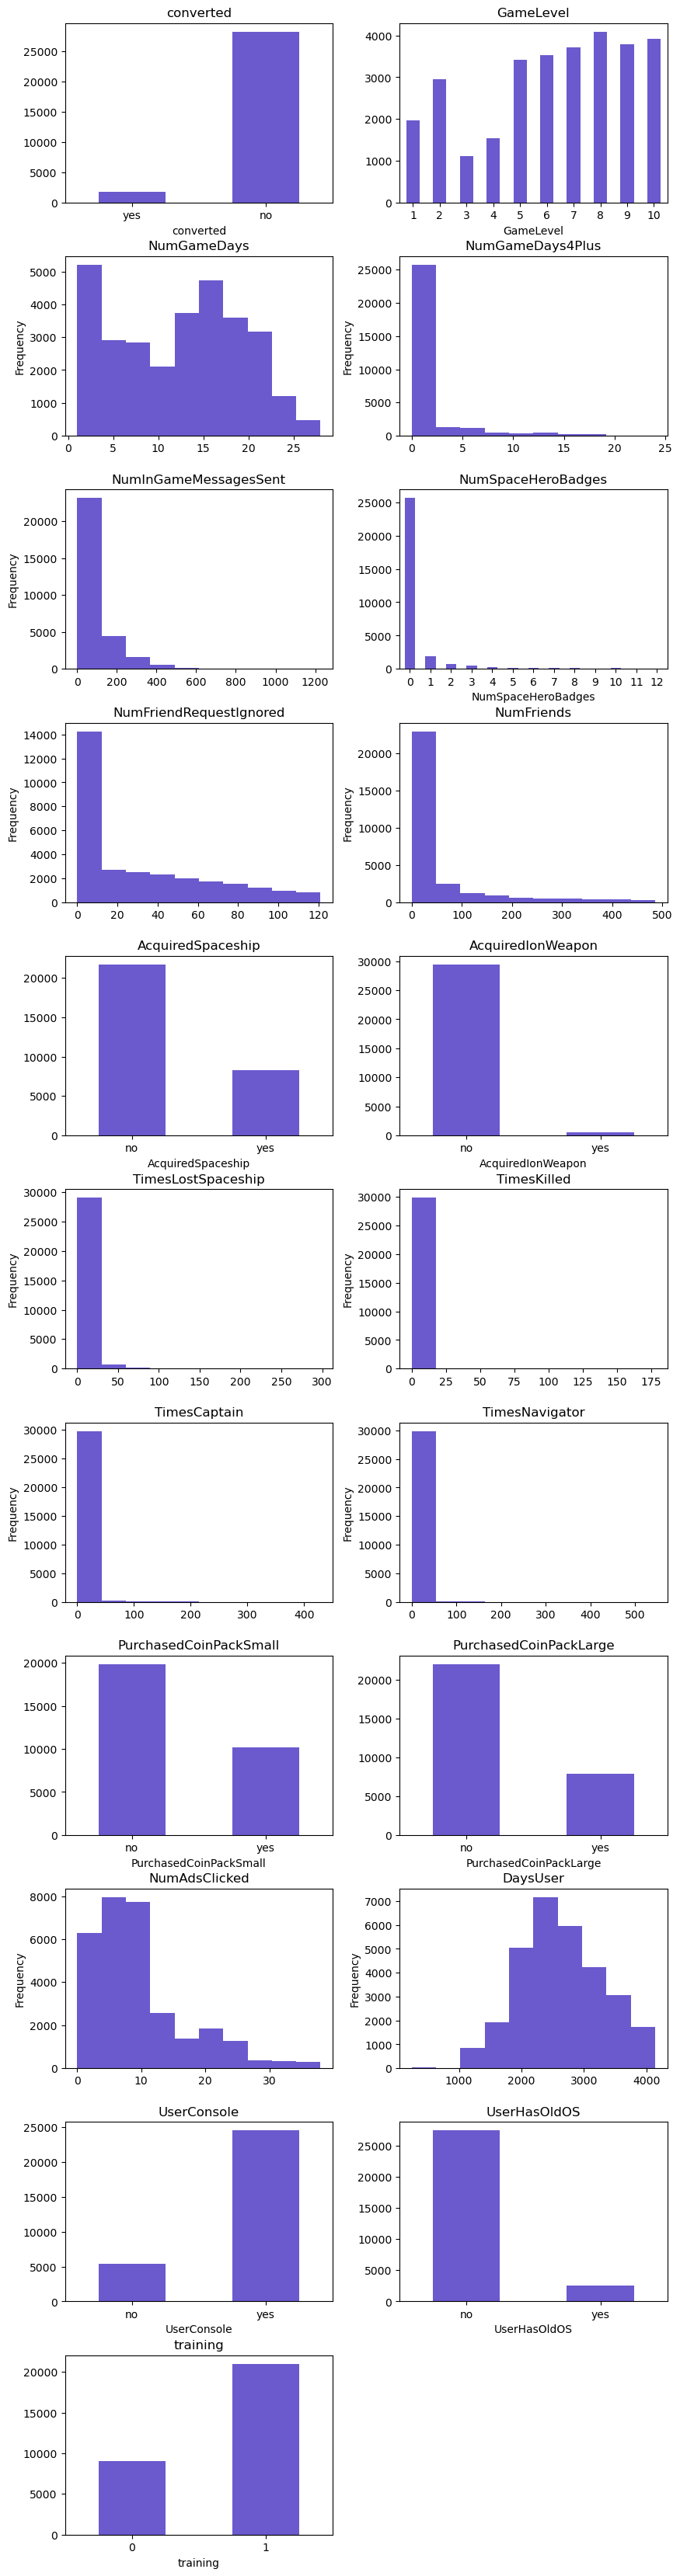

In [380]:
#3
rsm.distr_plot(cg_organic)

## Part II: Predictive Model 

In [381]:
evar = [
    "GameLevel",
    "NumGameDays",
    "NumGameDays4Plus",
    "NumInGameMessagesSent",
    "NumSpaceHeroBadges",
    "NumFriendRequestIgnored",
    "NumFriends",
    "AcquiredSpaceship",
    "AcquiredIonWeapon",
    "TimesLostSpaceship",
    "TimesKilled",
    "TimesCaptain",
    "TimesNavigator",
    "PurchasedCoinPackSmall",
    "PurchasedCoinPackLarge",
    "NumAdsClicked",
    "DaysUser",
    "UserConsole",
    "UserHasOldOS"
]

In [382]:
lr1 = rsm.model.logistic(
    data={"cg_organic": cg_organic[cg_organic['training'] == 1]},
    rvar="converted",
    lev="yes",
    evar = evar
)
lr1.summary()

Logistic regression (GLM)
Data                 : cg_organic
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.009  -99.1%        -4.75      0.190  -24.997  < .001  ***
AcquiredSpaceship[yes]       1.713   71.3%         0.54      0.072    7.486  < .001  ***
AcquiredIonWeapon[yes]       1.613   61.3%         0.48      0.203    2.353   0.019    *
PurchasedCoinPackSmall[yes]  0.912   -8.8%        -0.09      0.070   -1.316   0.18

In [383]:
lr1.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.184
Pseudo R-squared (McFadden adjusted): 0.18
Area under the RO Curve (AUC): 0.82
Log-likelihood: -3719.041, AIC: 7478.081, BIC: 7637.127
Chi-squared: 1682.617, df(19), p.value < 0.001 
Nr obs: 21,000


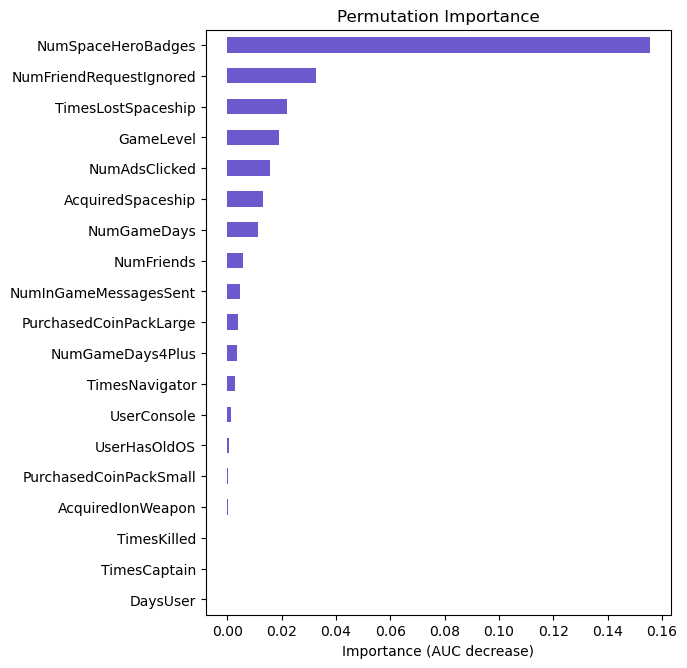

In [384]:
#1
lr1.plot('vimp')

The 5 most important features are - NumSpaceHeroBadges, NumFriendRequestIgnored, TimesLostSpaceship, GameLevel and NumAdsClicked

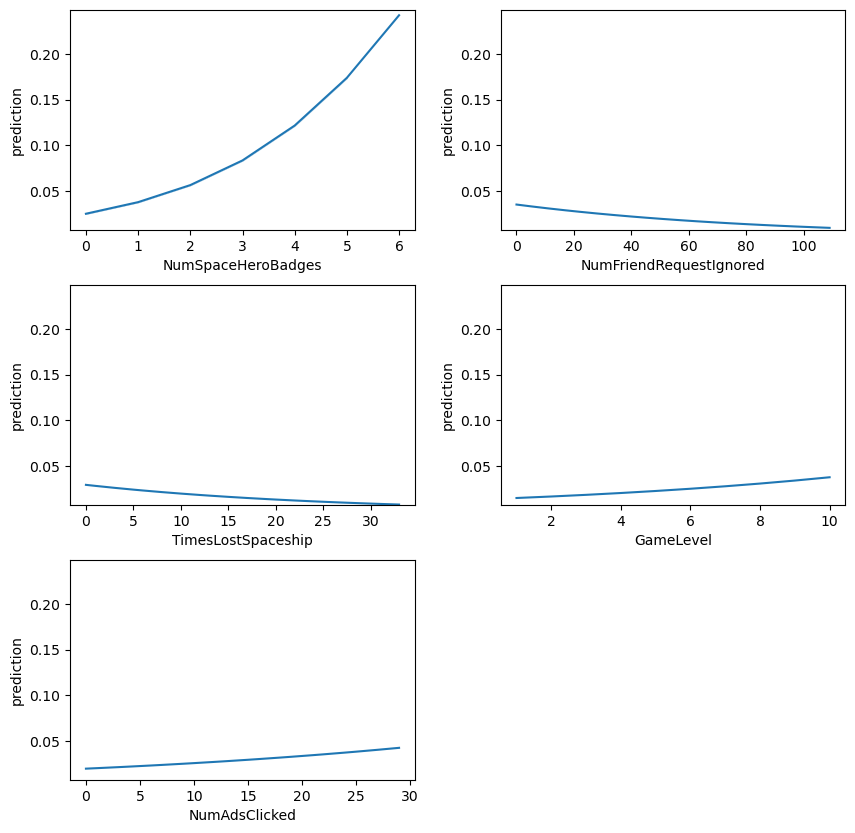

In [385]:
#2
lr1.plot("pred", incl = ['NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'TimesLostSpaceship', 'GameLevel', 'NumAdsClicked'])

NumSpaceHeroBadges: There appears to be a positive relationship between the number of Space Hero Badges and the prediction. As the number of badges increases, the prediction also increases, suggesting that players with more badges are more likely to convert.

NumFriendRequestIgnored: The plot shows a slight downward trend as the number of friend requests ignored increases indicating a mild negative relationship between the variable and probability of conversion.

TimesLostSpaceship: The plot shows a very slight downward trend as the number of times the user lost spaceship increases indicating a highly mild negative relationship between the variable and probability of conversion.

GameLevel: There is a slight upward trend as the game level increases, which might suggest a very mild positive relationship between the level of game and the likelihood of conversion. However, the change in prediction is minimal over the range of values.

NumAdsClicked: There is a slight upward trend as the number of ads clicked increases, which might suggest a very mild positive relationship between clicking ads and the likelihood of conversion. However, the change in prediction is minimal over the range of values.

In [386]:
#3
cg_organic["pred_logit"] = lr1.predict(data = cg_organic)['prediction']
cg_organic

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,training,pred_logit
34184,no,10,11,0,355,0,8,3,yes,no,...,5,0,no,no,4,2953,yes,yes,1,0.073430
192849,no,6,7,1,30,0,0,0,yes,no,...,0,0,no,yes,8,2343,yes,no,1,0.056571
84958,no,8,2,0,69,0,111,13,no,no,...,0,0,yes,no,11,2374,yes,no,1,0.008457
120745,no,5,3,0,40,0,33,1,no,no,...,2,0,no,no,3,2708,yes,no,1,0.014371
137887,no,6,15,0,5,0,62,0,no,no,...,0,0,no,no,11,2101,yes,yes,0,0.016892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143641,no,1,12,0,0,0,2,0,no,no,...,0,0,yes,no,3,2619,no,no,0,0.010917
149842,no,4,9,0,0,0,7,8,no,no,...,3,7,no,no,21,3835,yes,no,0,0.027490
155445,no,5,18,0,1,0,0,0,no,no,...,0,0,no,no,4,3562,yes,yes,1,0.028257
159416,no,8,22,0,83,0,0,0,no,no,...,0,0,no,no,10,3258,yes,no,1,0.063954


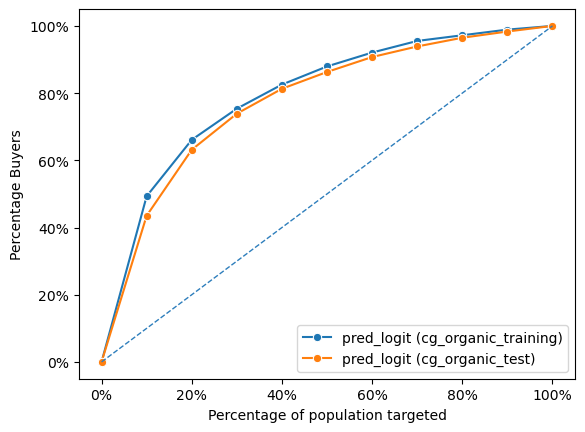

In [387]:
#4
lr_dct = {"cg_organic_training": cg_organic[cg_organic.training == 1], "cg_organic_test": cg_organic[cg_organic.training == 0]}
fig1 = rsm.gains_plot(lr_dct, "converted", "yes", "pred_logit")

In [388]:
#5
#AUC of training data
pred_train = cg_organic.loc[cg_organic.training == 1, "pred_logit"]
actual = cg_organic.loc[cg_organic.training == 1, "converted"]
rsm.auc(actual, pred_train, "yes")

0.8196839375160323

In [389]:
#AUC of test data
pred_test = cg_organic.loc[cg_organic.training == 0, "pred_logit"]
actual = cg_organic.loc[cg_organic.training == 0, "converted"]
rsm.auc(actual, pred_test, "yes")

0.8031498993082917

## Part III: The Ad-Experiment 

In [390]:
revenue = 14.99
cost = 1.50
profit = revenue - cost
profit

13.49

### Group 1

In [391]:
cg_organic_control = pd.read_parquet('data/cg_organic_control.parquet')
cg_organic_control

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS
110986,no,7,18,0,124,0,81,0,yes,no,8,0,0,4,no,yes,3,2101,no,no
155352,no,10,3,2,60,0,18,479,no,no,10,7,0,0,yes,no,7,1644,yes,no
115449,no,2,1,0,0,0,0,0,no,no,0,0,0,2,no,no,8,3197,yes,yes
138283,no,2,11,1,125,0,73,217,no,no,0,0,0,0,yes,no,6,913,no,no
186787,no,8,15,0,0,0,6,51,yes,no,0,0,2,1,yes,no,21,2009,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24497,no,10,2,0,14,0,105,0,no,no,0,0,0,0,no,no,11,2192,no,no
244206,no,9,7,0,163,2,83,5,no,no,0,0,0,0,yes,no,11,3743,yes,no
87602,no,10,15,0,1,1,59,9,no,no,3,0,0,0,yes,no,22,1858,yes,yes
189294,no,8,11,0,31,0,0,276,no,no,2,0,0,0,yes,no,19,1797,no,no


In [392]:
#1 
response_rate_group1 = (cg_organic_control[cg_organic_control['converted'] == 'yes'].shape[0]) / (cg_organic_control.shape[0])
response_rate_group1

0.05686666666666667

In [393]:
#There is no ad cost for this group since they were not served any in-app ads
profit_group1 = cg_organic_control.shape[0] * response_rate_group1 * revenue
profit_group1

25572.94

### Group 2

In [394]:
cg_ad_treatment = pd.read_parquet('data/cg_ad_treatment.parquet')
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesKilled,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,0,no,no,11,1827,no,no,0
49977,no,2,8,0,0,0,5,4,no,no,...,0,8,0,yes,no,3,1889,no,yes,1
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,0,no,yes,2,1948,yes,no,0
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,0,yes,yes,21,3409,yes,yes,0
82610,no,10,1,1,233,0,23,0,no,no,...,0,5,0,no,yes,4,2922,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,0,0,4,no,no,11,2343,yes,no,1
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,0,no,no,1,3166,yes,no,0
143309,no,1,5,0,207,0,37,10,yes,no,...,0,3,0,yes,yes,5,2619,yes,no,0
159361,no,7,19,1,0,0,88,0,no,no,...,0,1,4,no,no,9,2343,no,no,0


In [395]:
cg_ad_treatment.shape

(150000, 21)

In [396]:
cg_ad_treatment_30k = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]
cg_ad_treatment_30k.shape

(30000, 21)

In [397]:
response_rate_group2 = (cg_ad_treatment_30k[(cg_ad_treatment_30k['converted'] == 'yes')].shape[0]) / (cg_ad_treatment_30k.shape[0])
response_rate_group2

0.13043333333333335

In [398]:
#Taking into account in ad costs
profit_group2 = (cg_ad_treatment_30k.shape[0] * response_rate_group2 * revenue) - (cg_ad_treatment_30k.shape[0] * cost)
profit_group2

13655.87000000001

### Group 3

In [399]:
#a
cg_ad_treatment["pred_logit"] = lr1.predict(data = cg_ad_treatment)['prediction']
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
49977,no,2,8,0,0,0,5,4,no,no,...,8,0,yes,no,3,1889,no,yes,1,0.010403
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
82610,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,0,4,no,no,11,2343,yes,no,1,0.041353
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,no,no,1,3166,yes,no,0,0.038769
143309,no,1,5,0,207,0,37,10,yes,no,...,3,0,yes,yes,5,2619,yes,no,0,0.013292
159361,no,7,19,1,0,0,88,0,no,no,...,1,4,no,no,9,2343,no,no,0,0.010421


In [400]:
group3 = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]
group3

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
109438,no,6,16,0,0,0,0,0,yes,no,...,0,0,no,no,11,1827,no,no,0,0.058321
99506,no,6,1,0,0,0,0,0,no,no,...,0,0,no,yes,2,1948,yes,no,0,0.025690
411831,yes,7,16,0,102,1,0,194,no,no,...,0,0,yes,yes,21,3409,yes,yes,0,0.122049
82610,no,10,1,1,233,0,23,0,no,no,...,5,0,no,yes,4,2922,yes,no,0,0.039185
214343,no,1,6,0,0,0,0,0,no,no,...,0,0,no,yes,9,3470,yes,no,0,0.018541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191256,no,9,17,0,0,0,2,49,no,no,...,0,0,yes,no,3,2313,no,no,0,0.037411
87840,no,7,19,0,0,0,0,0,no,no,...,0,0,no,no,1,3166,yes,no,0,0.038769
143309,no,1,5,0,207,0,37,10,yes,no,...,3,0,yes,yes,5,2619,yes,no,0,0.013292
159361,no,7,19,1,0,0,88,0,no,no,...,1,4,no,no,9,2343,no,no,0,0.010421


In [401]:
#b
group3_best_30k = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0].sort_values(by = 'pred_logit', ascending=False).head(30000)
group3_best_30k

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesCaptain,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit
168043,no,10,13,10,29,11,0,390,yes,yes,...,0,0,no,yes,10,2131,yes,no,0,0.981272
161813,no,9,20,16,86,11,0,432,yes,no,...,0,2,no,no,12,1858,yes,no,0,0.977289
27577,no,9,26,11,0,12,48,386,yes,yes,...,0,0,yes,no,5,2343,yes,no,0,0.974903
201338,no,10,23,16,177,12,49,162,yes,no,...,0,3,yes,no,12,3166,yes,no,0,0.969542
175833,no,10,22,11,206,12,26,333,yes,no,...,0,0,yes,no,5,2313,yes,yes,0,0.968986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20850,no,2,13,6,328,0,42,428,yes,no,...,0,0,yes,no,11,2282,no,no,0,0.066212
7403,no,8,8,0,0,1,21,308,no,no,...,10,0,yes,no,15,2374,yes,no,0,0.066209
180484,no,9,17,6,2,0,33,152,yes,no,...,0,20,yes,no,17,2466,yes,no,0,0.066205
440811,yes,6,21,10,0,0,0,0,no,no,...,0,3,no,no,11,4018,yes,no,0,0.066201


In [402]:
response_rate_group3 = (group3_best_30k[(group3_best_30k['converted'] == 'yes')].shape[0]) / (group3_best_30k.shape[0])
response_rate_group3

0.21506666666666666

In [403]:
#Taking into account in ad costs
profit_group3 = (cg_ad_treatment_30k.shape[0] * response_rate_group3 * revenue) - (cg_ad_treatment_30k.shape[0] * cost)
profit_group3

51715.479999999996

Q4


Group 1 (No in-app ads): 
Had a response rate of 5.6%.
Generated a profit of $25,572.94.
This group represents the baseline or control group, which shows the organic conversion rate without any influence from in-app ads.


Group 2 (Random in-app ads):
Had a higher response rate of 13.04% compared to Group 1.
Despite the higher response rate, the profit was lower at $13,655.87.
The decrease in profit despite the higher response rate suggests that the cost of serving the ads ($1.50 per consumer) outweighed the additional revenue generated by the increased conversion rate. This implies that the ads were not targeted efficiently and that the cost of advertising to all these customers may have been higher than the revenue from the conversions it generated.


Group 3 (Model-selected in-app ads):
Had the highest response rate of 21.506%.
Generated the highest profit of $51,715.48.
This substantial increase in profit, despite the costs of advertising, indicates that the predictive model was effective in identifying the customers who were most likely to convert as a result of the ads. The model's targeting significantly improved the efficiency of the ad spending, resulting in a higher net profit.

The overall profit increased by $26,143 and AUC by 15.9% from Group 1 to Group 3.
The overall profot increased by $38,060 and AUC by 8.466% from Group 2 to Group 3.

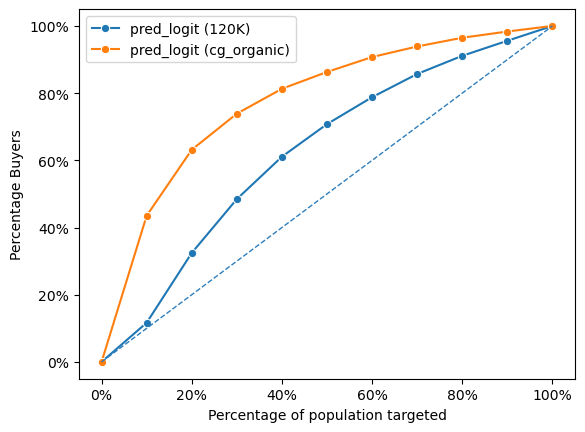

In [404]:
#5
fig2 = rsm.gains_plot({"120K": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0], "cg_organic": cg_organic[cg_organic['training'] == 0]}, "converted", "yes", "pred_logit")

In [405]:
#AUC of Customers not in Group 2
group3_pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_logit"] 
group3_actual = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual, group3_pred, "yes")

0.6444723410842776

In [406]:
#AUC of organic training data
pred_train = cg_organic.loc[cg_organic.training == 1, "pred_logit"]
actual = cg_organic.loc[cg_organic.training == 1, "converted"]
print(rsm.auc(actual, pred_train, "yes"))

#AUC of organic test data
pred_test = cg_organic.loc[cg_organic.training == 0, "pred_logit"]
actual = cg_organic.loc[cg_organic.training == 0, "converted"]
print(rsm.auc(actual, pred_test, "yes"))

0.8196839375160323
0.8031498993082917


In [407]:
#AUC of organic data
pred = cg_organic["pred_logit"]
actual = cg_organic["converted"]
print(rsm.auc(actual, pred, "yes"))

0.8146004571552785


Q5

The differences in the gains curve and AUC between the experiment and the original predictions come down to the model not accounting for how ads influence user behavior. Originally, the model was based on users' natural interactions with the game, not considering if they saw ads or not. During the experiment, ads could change users' decisions to purchase, something the model didn't predict. Therefore, when applied to data including ad influence, the model's effectiveness and accuracy in predicting purchases decreased, shown by a lower gains plot performance and reduced AUC.

Q6

Control Group for Comparison: 
Group 1 serves as a control group in the experimental setup, which is essential to establish a baseline for comparison. Gathering data from a control group, which isn't shown the ads, at the same time as the group that does see the ads makes the experiment more reliable. It helps us understand what would have occurred if we hadn't run the ad campaign. This makes our results more trustworthy because we can be more sure that any changes we see are actually because of the ads.

Validation of Predictive Models: It provides an opportunity to validate the predictive models built on historical cg_organic data by applying them to current, untouched data. This helps in assessing the stability and reliability of the model over time.

## Part IV: Better Data, Better Predictions

In [408]:
evar = [
    "GameLevel",
    "NumGameDays",
    "NumGameDays4Plus",
    "NumInGameMessagesSent",
    "NumSpaceHeroBadges",
    "NumFriendRequestIgnored",
    "NumFriends",
    "AcquiredSpaceship",
    "AcquiredIonWeapon",
    "TimesLostSpaceship",
    "TimesKilled",
    "TimesCaptain",
    "TimesNavigator",
    "PurchasedCoinPackSmall",
    "PurchasedCoinPackLarge",
    "NumAdsClicked",
    "DaysUser",
    "UserConsole",
    "UserHasOldOS"
]

In [409]:
lr_ad = rsm.model.logistic(
    data={"cg_ad_treatment_30k": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]},
    rvar="converted",
    lev="yes",
    evar = evar
)
lr_ad.summary()

Logistic regression (GLM)
Data                 : cg_ad_treatment_30k
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Null hyp.: There is no effect of x on converted
Alt. hyp.: There is an effect of x on converted

                                OR     OR%  coefficient  std.error  z.value p.value     
Intercept                    0.028  -97.2%        -3.57      0.101  -35.155  < .001  ***
AcquiredSpaceship[yes]       1.092    9.2%         0.09      0.041    2.143   0.032    *
AcquiredIonWeapon[yes]       0.879  -12.1%        -0.13      0.139   -0.929   0.353     
PurchasedCoinPackSmall[yes]  1.036    3.6%         0.04      0.038    0.9

In [410]:
lr_ad.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.094
Pseudo R-squared (McFadden adjusted): 0.093
Area under the RO Curve (AUC): 0.707
Log-likelihood: -10520.156, AIC: 21080.313, BIC: 21246.492
Chi-squared: 2192.265, df(19), p.value < 0.001 
Nr obs: 30,000


In [411]:
cg_ad_treatment["pred_logit_ad"] = lr_ad.predict(data = cg_ad_treatment)['prediction']
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad
109438,no,6,16,0,0,0,0,0,yes,no,...,0,no,no,11,1827,no,no,0,0.058321,0.130246
49977,no,2,8,0,0,0,5,4,no,no,...,0,yes,no,3,1889,no,yes,1,0.010403,0.041218
99506,no,6,1,0,0,0,0,0,no,no,...,0,no,yes,2,1948,yes,no,0,0.025690,0.052002
411831,yes,7,16,0,102,1,0,194,no,no,...,0,yes,yes,21,3409,yes,yes,0,0.122049,0.329918
82610,no,10,1,1,233,0,23,0,no,no,...,0,no,yes,4,2922,yes,no,0,0.039185,0.074874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,4,no,no,11,2343,yes,no,1,0.041353,0.107154
87840,no,7,19,0,0,0,0,0,no,no,...,0,no,no,1,3166,yes,no,0,0.038769,0.057251
143309,no,1,5,0,207,0,37,10,yes,no,...,0,yes,yes,5,2619,yes,no,0,0.013292,0.056848
159361,no,7,19,1,0,0,88,0,no,no,...,4,no,no,9,2343,no,no,0,0.010421,0.110083


In [412]:
#AUC of Group 3 data - New Ad Model
group3_pred_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_logit_ad"] 
group3_actual_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual_ad, group3_pred_ad, "yes")

0.7030674399706048

In [413]:
#2
#AUC of Group 3 data - Organic Model
group3_pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_logit"] 
group3_actual = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual, group3_pred, "yes")

0.6444723410842776

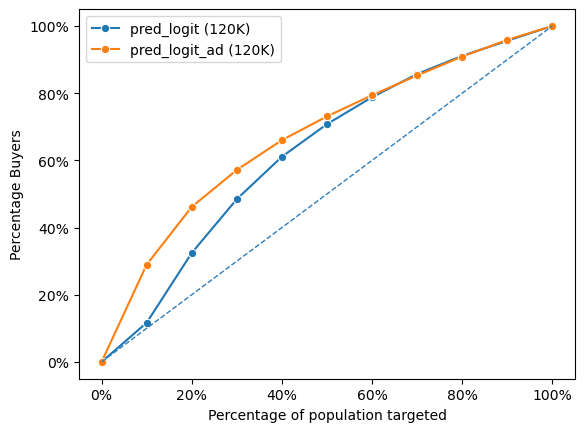

In [414]:
fig3 = rsm.gains_plot({"120K": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", ["pred_logit", "pred_logit_ad"])

Gains Plot Analysis: The gains plot indicates that the new ad model (pred_logit_ad) outperforms the organic model (pred_logit) when applied to the 120,000 customers not in group 2, suggesting that it is more effective at ranking customers likely to convert.

AUC Values: The AUC value is a measure of the model's ability to distinguish between those who converted and those who did not. The higher AUC value for the new ad model (0.703) compared to the organic model (0.644) signifies that the new ad model has a better predictive performance on the data set of customers not in group 2.

The fact that the ad model performs better than the organic model on this group of customers suggests that the features used to train the ad model capture the behavior of these customers more accurately. This could be because the ad model possibly incorporates the impact of advertising on customer behavior, even if indirectly, through the variables that are affected by advertising. For example, 'NumAdsClicked' could be a strong indicator of a user's engagement with the game and their susceptibility to marketing efforts, which might not be as effectively captured in the organic model.

The explanatory variables used in both models are the same; however, the difference in model performance underscores that the context in which the model is applied (organic vs. ad-influenced behavior) is crucial.

In [415]:
#3
best_30k_organic = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0].sort_values(by = 'pred_logit', ascending=False).head(30000)
best_30k_organic

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad
168043,no,10,13,10,29,11,0,390,yes,yes,...,0,no,yes,10,2131,yes,no,0,0.981272,0.310377
161813,no,9,20,16,86,11,0,432,yes,no,...,2,no,no,12,1858,yes,no,0,0.977289,0.379679
27577,no,9,26,11,0,12,48,386,yes,yes,...,0,yes,no,5,2343,yes,no,0,0.974903,0.233033
201338,no,10,23,16,177,12,49,162,yes,no,...,3,yes,no,12,3166,yes,no,0,0.969542,0.305284
175833,no,10,22,11,206,12,26,333,yes,no,...,0,yes,no,5,2313,yes,yes,0,0.968986,0.194915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20850,no,2,13,6,328,0,42,428,yes,no,...,0,yes,no,11,2282,no,no,0,0.066212,0.208222
7403,no,8,8,0,0,1,21,308,no,no,...,0,yes,no,15,2374,yes,no,0,0.066209,0.268734
180484,no,9,17,6,2,0,33,152,yes,no,...,20,yes,no,17,2466,yes,no,0,0.066205,0.287676
440811,yes,6,21,10,0,0,0,0,no,no,...,3,no,no,11,4018,yes,no,0,0.066201,0.137515


In [416]:
response_rate_organic = (best_30k_organic[best_30k_organic['converted'] == 'yes'].shape[0]) / best_30k_organic.shape[0]
response_rate_organic

0.21506666666666666

In [417]:
best_30k_organic.shape[0] * revenue * response_rate_organic

96715.48

In [418]:
profit_organic = profit_group3
profit_organic

51715.479999999996

In [419]:
best_30k_ad= cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0].sort_values(by = 'pred_logit_ad', ascending=False).head(30000)
best_30k_ad

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,TimesNavigator,PurchasedCoinPackSmall,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad
912291,yes,10,10,1,103,11,111,104,yes,no,...,20,no,yes,33,1948,yes,no,0,0.643925,0.860542
845691,yes,10,14,4,5,12,90,482,yes,no,...,3,yes,no,35,1644,yes,no,0,0.895946,0.849863
326911,yes,10,18,9,22,1,53,475,yes,no,...,0,yes,no,38,1736,yes,no,0,0.319902,0.844202
329551,yes,9,24,0,111,0,96,394,yes,no,...,0,no,yes,37,3592,no,no,0,0.139876,0.840149
785211,yes,10,23,0,182,0,2,444,yes,no,...,0,no,no,38,2588,yes,no,0,0.352640,0.824048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47458,no,5,23,0,41,6,73,49,no,no,...,0,no,no,11,3409,yes,no,0,0.215464,0.148979
91039,no,10,19,0,0,0,0,93,no,no,...,0,no,yes,7,2282,no,no,0,0.071909,0.148976
132577,no,10,17,0,112,0,74,0,no,no,...,0,no,no,12,2223,yes,no,0,0.030614,0.148973
89241,no,7,21,0,0,0,0,4,no,no,...,0,no,no,12,2708,no,no,0,0.046320,0.148969


In [420]:
response_rate_ad = (best_30k_ad[best_30k_ad['converted'] == 'yes'].shape[0]) / best_30k_ad.shape[0]
response_rate_ad

0.2739

In [421]:
profit_ad = (best_30k_ad.shape[0] * response_rate_ad * revenue) - (best_30k_ad.shape[0] * cost)
profit_ad

78172.83

In [422]:
#Profit Improvement
profit_improvement_logit = profit_ad - profit_organic
profit_improvement_logit

26457.350000000006

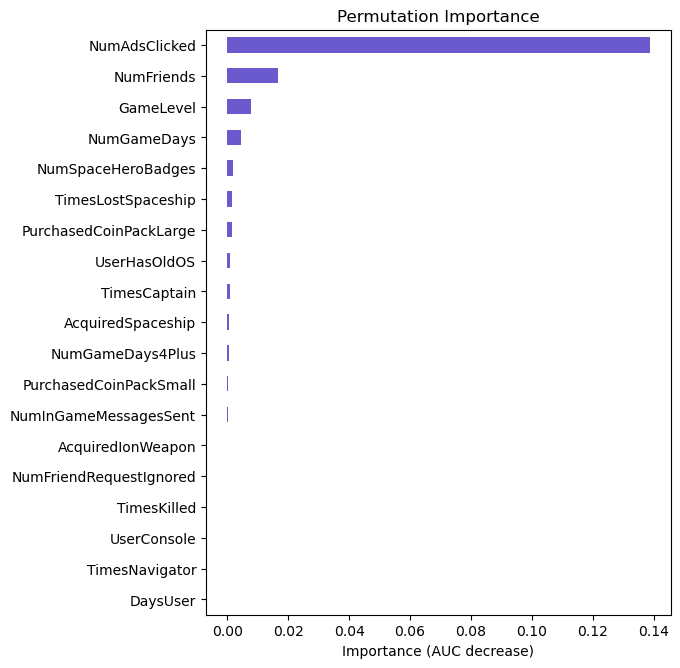

In [423]:
#4
lr_ad.plot('vimp')

<Axes: xlabel='Percentage of population targeted', ylabel='Percentage Buyers'>

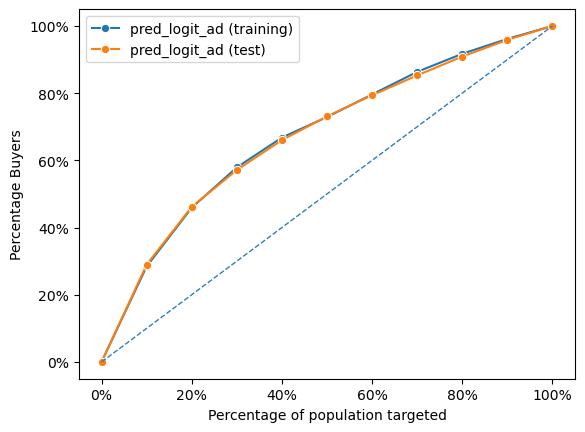

In [424]:
rsm.gains_plot({"training": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1], "test": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", 'pred_logit_ad')

In [425]:
cg_ad_treatment.columns

Index(['converted', 'GameLevel', 'NumGameDays', 'NumGameDays4Plus',
       'NumInGameMessagesSent', 'NumSpaceHeroBadges',
       'NumFriendRequestIgnored', 'NumFriends', 'AcquiredSpaceship',
       'AcquiredIonWeapon', 'TimesLostSpaceship', 'TimesKilled',
       'TimesCaptain', 'TimesNavigator', 'PurchasedCoinPackSmall',
       'PurchasedCoinPackLarge', 'NumAdsClicked', 'DaysUser', 'UserConsole',
       'UserHasOldOS', 'rnd_30k', 'pred_logit', 'pred_logit_ad'],
      dtype='object')

In [427]:
#rsm.radiant.logistic({"cg_ad_treatment": cg_ad_treatment})

In the "organic" model, the most important features appear to be 'NumSpaceHeroBadges', 'NumFriendRequestIgnored', and 'TimesLostSpaceship'. These features likely have a strong relationship with the target variable in the context of organic user interaction. For example, 'NumSpaceHeroBadges' could indicate engagement level, while 'NumFriendRequestIgnored' might be inversely related to social interaction within the game.


In contrast, the "ad" model shows a different set of important features, with 'NumAdsClicked' being the most significant, followed by 'NumFriends' and 'GameLevel'. The prominence of 'NumAdsClicked' in the "ad" model suggests that it is more sensitive to features related to advertising and monetization efforts.

The differences in the permutation importance plots suggests that the user behaviors driving the outcomes of interest are different in organic versus ad-influenced environments. The "organic" model values features related to game engagement, while the "ad" model prioritizes features that are directly linked to advertising.

## Part V: Better Models, Better Predictions

### Neural Network - 1 node 1 layer

In [430]:
evar = [
    "GameLevel",
    "NumGameDays",
    "NumGameDays4Plus",
    "NumInGameMessagesSent",
    "NumSpaceHeroBadges",
    "NumFriendRequestIgnored",
    "NumFriends",
    "AcquiredSpaceship",
    "AcquiredIonWeapon",
    "TimesLostSpaceship",
    "TimesKilled",
    "TimesCaptain",
    "TimesNavigator",
    "PurchasedCoinPackSmall",
    "PurchasedCoinPackLarge",
    "NumAdsClicked",
    "DaysUser",
    "UserConsole",
    "UserHasOldOS"
]

In [431]:
clf1 = rsm.model.mlp(
    data={"cg_ad_treatment_30k": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]},
    rvar="converted",
    lev="yes",
    evar= evar,
    hidden_layer_sizes=(1,),
    mod_type="classification",
)
clf1.summary()

Multi-layer Perceptron (NN)
Data                 : cg_ad_treatment_30k
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 30,000
Hidden_layer_sizes   : (1,)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.0001
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.706

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends AcquiredSpaceship Ac

In [432]:
cg_ad_treatment["pred_nn1"] = clf1.predict(cg_ad_treatment)["prediction"]

### Hyper Parameter Tuning

In [433]:
hls = [(1,), (2,), (3,), (3, 3), (4, 3), (3, 5)]
alpha = [0.0001, 0.001, 0.01, 0.1]

param_grid = {"hidden_layer_sizes": hls, "alpha": alpha}
scoring = {"AUC": "roc_auc"}

clf_cv = GridSearchCV(
    clf1.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit="AUC", verbose=5
)

In [434]:
clf1.data_onehot.mean().round(3)
lr_ad.data.converted

49977     0.0
146436    0.0
85884     0.0
1668      0.0
192886    0.0
         ... 
218705    0.0
208111    0.0
77482     0.0
215146    0.0
172637    0.0
Name: converted, Length: 30000, dtype: float64

In [435]:
clf_cv.fit(clf1.data_onehot, clf1.data.converted)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh', hidden_layer_sizes=(1,),
                                     max_iter=10000, random_state=1234,
                                     solver='lbfgs'),
             n_jobs=4,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (3, 3),
                                                (4, 3), (3, 5)]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [436]:
clf1.data_onehot.head()

,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,TimesLostSpaceship,TimesKilled,TimesCaptain,TimesNavigator,NumAdsClicked,DaysUser,AcquiredSpaceship_yes,AcquiredIonWeapon_yes,PurchasedCoinPackSmall_yes,PurchasedCoinPackLarge_yes,UserConsole_yes,UserHasOldOS_yes
49977,-1.562310,-0.622508,-0.410992,-0.691781,-0.371999,-0.729964,-0.482059,-0.320636,-0.081651,0.868067,-0.206064,-0.842604,-1.120787,False,False,True,False,False,True
146436,-0.478309,0.360651,-0.410992,0.963396,-0.371999,0.581947,3.191052,1.366772,-0.081651,0.332358,0.410387,-0.988806,-1.997150,True,False,False,False,True,False
85884,0.244358,-0.762959,-0.410992,1.777114,-0.371999,0.990097,-0.523100,0.062866,-0.081651,-0.203351,-0.206064,-1.135009,1.402716,False,False,False,True,True,False
1668,-0.839643,-1.184313,-0.410992,-0.358896,-0.371999,-0.875731,-0.523100,-0.320636,-0.081651,-0.203351,-0.206064,-0.988806,0.437359,False,False,False,False,True,False
192886,0.605692,0.641553,-0.410992,1.361008,4.094315,0.960943,-0.317898,0.446368,-0.081651,1.001994,0.718613,-0.696401,-0.663751,True,False,True,False,True,False


In [437]:
pd.DataFrame(clf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

,param_hidden_layer_sizes,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
23,"(3, 5)","{'alpha': 0.1, 'hidden_layer_sizes': (3, 5)}",0.766738,0.779052,0.793781,0.789748,0.778961,0.781656,0.009477,1
5,"(3, 5)","{'alpha': 0.0001, 'hidden_layer_sizes': (3, 5)}",0.766718,0.776503,0.778945,0.787076,0.778710,0.777590,0.006519,2
4,"(4, 3)","{'alpha': 0.0001, 'hidden_layer_sizes': (4, 3)}",0.760439,0.779896,0.786318,0.784477,0.775393,0.777304,0.009247,3
11,"(3, 5)","{'alpha': 0.001, 'hidden_layer_sizes': (3, 5)}",0.766502,0.784073,0.775967,0.780501,0.779335,0.777276,0.005977,4
16,"(4, 3)","{'alpha': 0.01, 'hidden_layer_sizes': (4, 3)}",0.756443,0.784300,0.786208,0.781168,0.775741,0.776772,0.010765,5
17,"(3, 5)","{'alpha': 0.01, 'hidden_layer_sizes': (3, 5)}",0.766567,0.777234,0.772062,0.785611,0.778169,0.775929,0.006373,6
22,"(4, 3)","{'alpha': 0.1, 'hidden_layer_sizes': (4, 3)}",0.768841,0.774786,0.788123,0.767740,0.776089,0.775116,0.007267,7
10,"(4, 3)","{'alpha': 0.001, 'hidden_layer_sizes': (4, 3)}",0.756388,0.778261,0.784221,0.778181,0.773852,0.774181,0.009488,8
9,"(3, 3)","{'alpha': 0.001, 'hidden_layer_sizes': (3, 3)}",0.770151,0.769950,0.765951,0.760662,0.761308,0.765604,0.004064,9
3,"(3, 3)","{'alpha': 0.0001, 'hidden_layer_sizes': (3, 3)}",0.770087,0.760923,0.765686,0.764492,0.763281,0.764894,0.003037,10


In [438]:
clf_cv.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (3, 5)}

In [439]:
clf_cv.best_score_.round(3)

0.782

In [440]:
# prediction on training set
pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 1, "pred_nn1"]
actual = rsm.ifelse(cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 1, "converted"] == "yes", 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
metrics.auc(fpr, tpr).round(3)

0.706

In [441]:
# prediction on test set
pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_nn1"]
actual = rsm.ifelse(cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"] == "yes", 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
metrics.auc(fpr, tpr).round(3)

0.703

In [442]:
clf2_ad = rsm.model.mlp(
    data={"cg_ad_treatment_30k": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]},
    rvar="converted",
    lev="yes",
    evar= evar,
    hidden_layer_sizes=(3,5),
    alpha = 0.1,
    mod_type="classification",
)
clf2_ad.summary()

Multi-layer Perceptron (NN)
Data                 : cg_ad_treatment_30k
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
Model type           : classification
Nr. of features      : (19, 19)
Nr. of observations  : 30,000
Hidden_layer_sizes   : (3, 5)
Activation function  : tanh
Solver               : lbfgs
Alpha                : 0.1
Batch size           : auto
Learning rate        : 0.001
Maximum iterations   : 10000
random_state         : 1234
AUC                  : 0.782

Raw data             :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends AcquiredSpaceship Acq

In [443]:
cg_ad_treatment["pred_nn2_ad"] = clf2_ad.predict(cg_ad_treatment)["prediction"]
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_nn1,pred_nn2_ad
109438,no,6,16,0,0,0,0,0,yes,no,...,no,11,1827,no,no,0,0.058321,0.130246,0.126276,0.050039
49977,no,2,8,0,0,0,5,4,no,no,...,no,3,1889,no,yes,1,0.010403,0.041218,0.046237,0.038916
99506,no,6,1,0,0,0,0,0,no,no,...,yes,2,1948,yes,no,0,0.025690,0.052002,0.055321,0.030834
411831,yes,7,16,0,102,1,0,194,no,no,...,yes,21,3409,yes,yes,0,0.122049,0.329918,0.340940,0.503720
82610,no,10,1,1,233,0,23,0,no,no,...,yes,4,2922,yes,no,0,0.039185,0.074874,0.075883,0.021353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,no,11,2343,yes,no,1,0.041353,0.107154,0.103914,0.029708
87840,no,7,19,0,0,0,0,0,no,no,...,no,1,3166,yes,no,0,0.038769,0.057251,0.059992,0.026111
143309,no,1,5,0,207,0,37,10,yes,no,...,yes,5,2619,yes,no,0,0.013292,0.056848,0.059547,0.053562
159361,no,7,19,1,0,0,88,0,no,no,...,no,9,2343,no,no,0,0.010421,0.110083,0.107279,0.053989


In [444]:
#2

#AUC of Logistic Regression - Ad Model
group3_pred_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_logit_ad"] 
group3_actual_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual_ad, group3_pred_ad, "yes")

0.7030674399706048

In [445]:
#AUC of Neural Network - Ad Model
group3_pred_nn = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_nn2_ad"] 
group3_actual_nn = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual_nn, group3_pred_nn, "yes")

0.7713605067969316

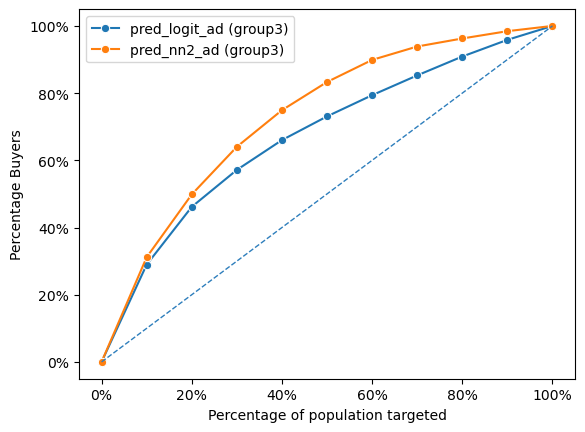

In [446]:
fig4 = rsm.gains_plot({"group3": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", ["pred_logit_ad", "pred_nn2_ad"])

From the AUC scores, we can infer that the neural network model performs better than the logistic regression model. In this case, the neural network's AUC of approximately 0.771 suggests that it is more effective at more effective at ranking customers likely to convert than the logistic regression model with an AUC of approximately 0.703

The neural network (pred_nn2_ad) consistently outperforms the logistic regression model (pred_logit_ad) across almost all segments of the population targeted. This is indicated by the higher curve for the neural network model, demonstrating that it captures a higher percentage of buyers at each percentile of the population targeted.

What this means in practical terms is that if a business were to use these models to target advertising to the most likely buyers, the neural network model would allow them to reach a larger proportion of these buyers generating higher revenue with less advertising expenditure. This is because the model is more accurate at predicting who is likely to buy, and therefore, the advertising can be more effectively directed. Neural networks are also generally better at capturing interactions between variables (if present) which we might find on further analysis.

In [447]:
#3
print(response_rate_ad)
print(profit_ad)

0.2739
78172.83


<Axes: xlabel='Percentage of population targeted', ylabel='Percentage Buyers'>

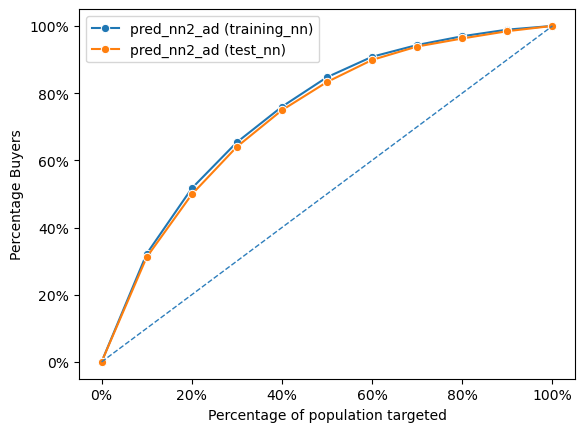

In [448]:
rsm.gains_plot({"training_nn": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1], "test_nn": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", 'pred_nn2_ad')

In [449]:
nn_best_30k_ad = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0].sort_values(by = 'pred_nn2_ad', ascending=False).head(30000)
nn_best_30k_ad

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,PurchasedCoinPackLarge,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_nn1,pred_nn2_ad
659761,yes,9,12,0,0,3,93,426,yes,no,...,yes,36,3623,no,no,0,0.248392,0.817971,0.757236,0.864910
90750,no,10,22,2,0,0,25,272,no,no,...,no,7,2343,yes,no,0,0.011143,0.795085,0.722165,0.864615
59581,no,10,28,19,16,0,11,105,yes,no,...,no,23,3074,no,no,0,0.093095,0.809068,0.742372,0.857392
620411,yes,8,18,6,348,3,106,5,no,no,...,yes,38,2162,no,no,0,0.176455,0.693923,0.672770,0.837515
788911,yes,9,19,0,241,2,104,170,yes,no,...,yes,36,2313,yes,no,0,0.217308,0.755588,0.715405,0.835478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44272,no,1,17,0,0,0,0,5,no,no,...,no,22,2588,no,no,0,0.029113,0.225951,0.223371,0.184468
114250,no,10,20,0,16,0,25,19,no,no,...,yes,13,2009,yes,no,0,0.045869,0.195460,0.195354,0.184468
8123,no,8,13,0,0,0,0,273,no,no,...,no,1,3044,yes,no,0,0.049694,0.087881,0.086148,0.184465
26290,no,10,28,0,209,0,97,3,no,no,...,no,17,1797,no,no,0,0.033659,0.256628,0.263481,0.184463


In [450]:
response_rate_ad_nn = (nn_best_30k_ad[nn_best_30k_ad['converted'] == 'yes'].shape[0]) / nn_best_30k_ad.shape[0]
response_rate_ad_nn

0.3011333333333333

In [451]:
nn_profit_ad = (nn_best_30k_ad.shape[0] * response_rate_ad_nn * revenue) - (nn_best_30k_ad.shape[0] * cost)
nn_profit_ad

90419.66

In [452]:
profit_improvement_nn = nn_profit_ad - profit_ad
profit_improvement_nn

12246.830000000002

### Random Forest

In [453]:
evar = [
    "GameLevel",
    "NumGameDays",
    "NumGameDays4Plus",
    "NumInGameMessagesSent",
    "NumSpaceHeroBadges",
    "NumFriendRequestIgnored",
    "NumFriends",
    "AcquiredSpaceship",
    "AcquiredIonWeapon",
    "TimesLostSpaceship",
    "TimesKilled",
    "TimesCaptain",
    "TimesNavigator",
    "PurchasedCoinPackSmall",
    "PurchasedCoinPackLarge",
    "NumAdsClicked",
    "DaysUser",
    "UserConsole",
    "UserHasOldOS"
]

In [454]:
rf1 = rsm.model.rforest(
    {"cg_ad_treatment_30k": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]}, 
    rvar="converted", 
    lev="yes", 
    evar=evar
)
rf1.summary()

Random Forest
Data                 : cg_ad_treatment_30k
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 30,000
max_features         : sqrt (5)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.762

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  AcquiredSpaceship_no  AcquiredSpac

In [455]:
cg_ad_treatment["pred_rf1"] = rf1.predict(cg_ad_treatment)["prediction"]
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,NumAdsClicked,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_nn1,pred_nn2_ad,pred_rf1
109438,no,6,16,0,0,0,0,0,yes,no,...,11,1827,no,no,0,0.058321,0.130246,0.126276,0.050039,0.00
49977,no,2,8,0,0,0,5,4,no,no,...,3,1889,no,yes,1,0.010403,0.041218,0.046237,0.038916,0.08
99506,no,6,1,0,0,0,0,0,no,no,...,2,1948,yes,no,0,0.025690,0.052002,0.055321,0.030834,0.02
411831,yes,7,16,0,102,1,0,194,no,no,...,21,3409,yes,yes,0,0.122049,0.329918,0.340940,0.503720,0.31
82610,no,10,1,1,233,0,23,0,no,no,...,4,2922,yes,no,0,0.039185,0.074874,0.075883,0.021353,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,11,2343,yes,no,1,0.041353,0.107154,0.103914,0.029708,0.00
87840,no,7,19,0,0,0,0,0,no,no,...,1,3166,yes,no,0,0.038769,0.057251,0.059992,0.026111,0.05
143309,no,1,5,0,207,0,37,10,yes,no,...,5,2619,yes,no,0,0.013292,0.056848,0.059547,0.053562,0.07
159361,no,7,19,1,0,0,88,0,no,no,...,9,2343,no,no,0,0.010421,0.110083,0.107279,0.053989,0.11


In [456]:
max_features = ['sqrt', 'log2', 5, 11, 14]
max_depth = [3, 4 ,5, 6, 7]

param_grid = {'max_features': max_features, 'max_depth': max_depth}
scoring = {"AUC": "roc_auc"}

rf_cv = GridSearchCV(
    rf1.fitted, param_grid, scoring=scoring, cv=5, n_jobs=4, refit="AUC", verbose=5
)

In [457]:
rf1.data_onehot.mean().round(3)

GameLevel                        6.324
NumGameDays                     12.432
NumGameDays4Plus                 1.412
NumInGameMessagesSent           74.813
NumSpaceHeroBadges               0.833
NumFriendRequestIgnored         30.039
NumFriends                      50.984
TimesLostSpaceship               4.180
TimesKilled                      0.288
TimesCaptain                     1.518
TimesNavigator                   1.337
NumAdsClicked                    8.763
DaysUser                      2632.045
AcquiredSpaceship_no             0.703
AcquiredSpaceship_yes            0.297
AcquiredIonWeapon_no             0.982
AcquiredIonWeapon_yes            0.018
PurchasedCoinPackSmall_no        0.658
PurchasedCoinPackSmall_yes       0.342
PurchasedCoinPackLarge_no        0.733
PurchasedCoinPackLarge_yes       0.267
UserConsole_no                   0.172
UserConsole_yes                  0.828
UserHasOldOS_no                  0.915
UserHasOldOS_yes                 0.085
dtype: float64

In [458]:
rf_cv.fit(rf1.data_onehot, rf1.data.converted)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True,
                                              random_state=1234),
             n_jobs=4,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', 5, 11, 14]},
             refit='AUC', scoring={'AUC': 'roc_auc'}, verbose=5)

In [459]:
rf1.data_onehot.head()

,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,TimesLostSpaceship,TimesKilled,TimesCaptain,...,AcquiredIonWeapon_no,AcquiredIonWeapon_yes,PurchasedCoinPackSmall_no,PurchasedCoinPackSmall_yes,PurchasedCoinPackLarge_no,PurchasedCoinPackLarge_yes,UserConsole_no,UserConsole_yes,UserHasOldOS_no,UserHasOldOS_yes
49977,2,8,0,0,0,5,4,0,0,8,...,True,False,False,True,True,False,True,False,False,True
146436,5,15,0,179,0,50,362,22,0,4,...,True,False,True,False,True,False,False,True,True,False
85884,7,7,0,267,0,64,0,5,0,0,...,True,False,True,False,False,True,False,True,True,False
1668,4,4,0,36,0,0,0,0,0,0,...,True,False,True,False,True,False,False,True,True,False
192886,8,17,0,222,10,63,20,10,0,9,...,True,False,False,True,True,False,False,True,True,False


In [460]:
pd.DataFrame(rf_cv.cv_results_).iloc[:, 5:].sort_values("rank_test_AUC")

,param_max_features,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC
23,11,"{'max_depth': 7, 'max_features': 11}",0.767459,0.785530,0.784615,0.782848,0.775514,0.779193,0.006843,1
24,14,"{'max_depth': 7, 'max_features': 14}",0.768525,0.784964,0.783799,0.781298,0.774938,0.778705,0.006159,2
18,11,"{'max_depth': 6, 'max_features': 11}",0.768311,0.782422,0.780871,0.779662,0.773778,0.777009,0.005241,3
22,5,"{'max_depth': 7, 'max_features': 5}",0.764811,0.784803,0.782609,0.777401,0.775404,0.777006,0.006980,4
20,sqrt,"{'max_depth': 7, 'max_features': 'sqrt'}",0.764811,0.784803,0.782609,0.777401,0.775404,0.777006,0.006980,4
19,14,"{'max_depth': 6, 'max_features': 14}",0.765993,0.781382,0.781363,0.779526,0.773913,0.776435,0.005894,6
21,log2,"{'max_depth': 7, 'max_features': 'log2'}",0.763829,0.782098,0.781380,0.775980,0.775073,0.775672,0.006551,7
17,5,"{'max_depth': 6, 'max_features': 5}",0.763702,0.780297,0.777186,0.777331,0.771576,0.774018,0.005879,8
15,sqrt,"{'max_depth': 6, 'max_features': 'sqrt'}",0.763702,0.780297,0.777186,0.777331,0.771576,0.774018,0.005879,8
13,11,"{'max_depth': 5, 'max_features': 11}",0.763256,0.780474,0.776051,0.776451,0.770519,0.773350,0.005959,10


In [461]:
rf_cv.best_params_

{'max_depth': 7, 'max_features': 11}

In [462]:
rf_cv.best_score_.round(3)

0.779

In [463]:
# prediction on training set
pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 1, "pred_rf1"]
actual = rsm.ifelse(cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 1, "converted"] == "yes", 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
metrics.auc(fpr, tpr).round(3)

1.0

In [464]:
# prediction on test set
pred = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_rf1"]
actual = rsm.ifelse(cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"] == "yes", 1, 0)
fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
metrics.auc(fpr, tpr).round(3)

0.772

In [465]:
rf2 = rsm.model.rforest(
    {"cg_ad_treatment_30k": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1]}, 
    rvar="converted", 
    lev="yes", 
    evar=evar,
    max_features = 11,
    max_depth = 7
)
rf2.summary()

Random Forest
Data                 : cg_ad_treatment_30k
Response variable    : converted
Level                : yes
Explanatory variables: GameLevel, NumGameDays, NumGameDays4Plus, NumInGameMessagesSent, NumSpaceHeroBadges, NumFriendRequestIgnored, NumFriends, AcquiredSpaceship, AcquiredIonWeapon, TimesLostSpaceship, TimesKilled, TimesCaptain, TimesNavigator, PurchasedCoinPackSmall, PurchasedCoinPackLarge, NumAdsClicked, DaysUser, UserConsole, UserHasOldOS
OOB                  : True
Model type           : classification
Nr. of features      : (19, 25)
Nr. of observations  : 30,000
max_features         : 11 (11)
n_estimators         : 100
min_samples_leaf     : 1
random_state         : 1234
AUC                  : 0.779
Extra arguments      : max_depth=7

Estimation data      :
 GameLevel  NumGameDays  NumGameDays4Plus  NumInGameMessagesSent  NumSpaceHeroBadges  NumFriendRequestIgnored  NumFriends  TimesLostSpaceship  TimesKilled  TimesCaptain  TimesNavigator  NumAdsClicked  DaysUser  

In [466]:
cg_ad_treatment["pred_rf2"] = rf2.predict(cg_ad_treatment)["prediction"]
cg_ad_treatment

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_nn1,pred_nn2_ad,pred_rf1,pred_rf2
109438,no,6,16,0,0,0,0,0,yes,no,...,1827,no,no,0,0.058321,0.130246,0.126276,0.050039,0.00,0.015451
49977,no,2,8,0,0,0,5,4,no,no,...,1889,no,yes,1,0.010403,0.041218,0.046237,0.038916,0.08,0.109318
99506,no,6,1,0,0,0,0,0,no,no,...,1948,yes,no,0,0.025690,0.052002,0.055321,0.030834,0.02,0.033999
411831,yes,7,16,0,102,1,0,194,no,no,...,3409,yes,yes,0,0.122049,0.329918,0.340940,0.503720,0.31,0.286990
82610,no,10,1,1,233,0,23,0,no,no,...,2922,yes,no,0,0.039185,0.074874,0.075883,0.021353,0.06,0.027595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172637,no,6,8,0,115,0,13,0,yes,no,...,2343,yes,no,1,0.041353,0.107154,0.103914,0.029708,0.00,0.010360
87840,no,7,19,0,0,0,0,0,no,no,...,3166,yes,no,0,0.038769,0.057251,0.059992,0.026111,0.05,0.032243
143309,no,1,5,0,207,0,37,10,yes,no,...,2619,yes,no,0,0.013292,0.056848,0.059547,0.053562,0.07,0.131105
159361,no,7,19,1,0,0,88,0,no,no,...,2343,no,no,0,0.010421,0.110083,0.107279,0.053989,0.11,0.058466


In [467]:
#5
#AUC of Logistic Regression - Ad Model
group3_pred_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_logit_ad"] 
group3_actual_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual_ad, group3_pred_ad, "yes")

0.7030674399706048

In [468]:
#5
#AUC of Random Forest - Ad Model
group3_pred_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "pred_rf2"] 
group3_actual_ad = cg_ad_treatment.loc[cg_ad_treatment.rnd_30k == 0, "converted"]
rsm.auc(group3_actual_ad, group3_pred_ad, "yes")

0.7808051549004089

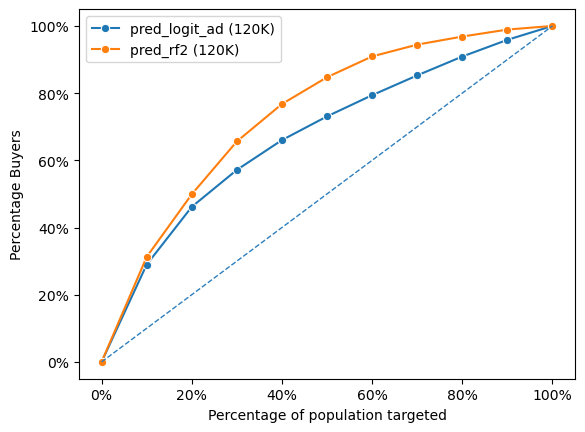

In [479]:
fig5 = rsm.gains_plot({"120K": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", ["pred_logit_ad", "pred_rf2"])

Based on the AUC scores, we can deduce that the random forest model surpasses the logistic regression model in performance. The random forest's AUC score of around 0.7808 indicates that it has a superior capacity for identifying customers who are more inclined to make a purchase compared to the logistic regression model with an AUC of about 0.703.

The random forest model, referred to as pred_nf2, demonstrates a consistent advantage over the logistic regression model, denoted as pred_logit_ad, throughout virtually the entire customer spectrum being analyzed. This advantage is depicted by the neural network's gains curve, which shows it capturing a greater share of potential buyers at each percentile of the targeted customer base.

This implies that if a company were to apply these predictive models for focusing their marketing efforts on the most probable purchasers, utilizing the random forest model would likely result in reaching a broader segment of these potential buyers. Consequently, this could lead to increased revenue while simultaneously reducing advertising costs, owing to the model's heightened precision in forecasting potential purchases. Moreover, random forests generally have a more robust capability to detect and learn from complex variable interactions, which could be revealed upon a more detailed examination of the models.

In [470]:
#6
print(response_rate_ad)
print(profit_ad)

0.2739
78172.83


In [471]:
rf_best_30k_ad = cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0].sort_values(by = 'pred_rf2', ascending=False).head(30000)
rf_best_30k_ad

,converted,GameLevel,NumGameDays,NumGameDays4Plus,NumInGameMessagesSent,NumSpaceHeroBadges,NumFriendRequestIgnored,NumFriends,AcquiredSpaceship,AcquiredIonWeapon,...,DaysUser,UserConsole,UserHasOldOS,rnd_30k,pred_logit,pred_logit_ad,pred_nn1,pred_nn2_ad,pred_rf1,pred_rf2
87341,no,10,21,0,246,1,96,53,no,no,...,2708,no,no,0,0.065895,0.631867,0.625944,0.390112,0.75,0.811998
528531,yes,6,15,1,200,4,112,7,no,yes,...,2557,yes,no,0,0.116856,0.409588,0.419063,0.597414,0.62,0.785420
112569,no,5,13,0,111,4,97,40,yes,no,...,2435,no,no,0,0.138479,0.400163,0.412215,0.600672,0.66,0.783536
830010,yes,9,16,0,251,1,102,66,no,no,...,2678,yes,no,0,0.055531,0.542058,0.548332,0.568392,0.69,0.781680
1088551,yes,10,15,1,249,3,118,25,no,no,...,2313,yes,no,0,0.097891,0.598331,0.596889,0.796863,0.69,0.779382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708181,yes,7,15,4,2,1,4,3,yes,no,...,3592,yes,yes,0,0.093934,0.122750,0.119955,0.233441,0.31,0.174969
175834,no,10,20,0,222,0,94,18,no,no,...,2984,yes,no,0,0.004592,0.083033,0.082245,0.153613,0.09,0.174968
93595,no,6,17,0,77,1,74,333,no,no,...,2162,yes,no,0,0.047804,0.213788,0.210919,0.246787,0.23,0.174964
988521,yes,10,18,0,0,1,0,182,yes,no,...,2739,yes,no,0,0.167520,0.144698,0.141732,0.195561,0.04,0.174956


In [472]:
response_rate_ad_rf = (rf_best_30k_ad[rf_best_30k_ad['converted'] == 'yes'].shape[0]) / rf_best_30k_ad.shape[0]
response_rate_ad_rf

0.30446666666666666

In [473]:
rf_profit_ad = (rf_best_30k_ad.shape[0] * response_rate_ad_rf * revenue) - (rf_best_30k_ad.shape[0] * cost)
rf_profit_ad

91918.66

In [474]:
profit_improvement_rf = rf_profit_ad - profit_ad
profit_improvement_rf

13745.830000000002

<Axes: xlabel='Percentage of population targeted', ylabel='Percentage Buyers'>

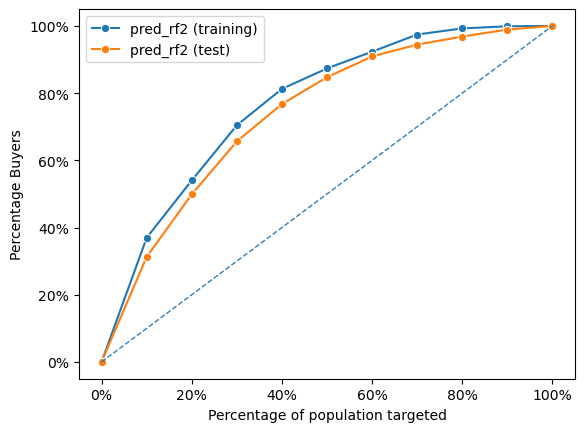

In [475]:
rsm.gains_plot({"training": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 1], "test": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", 'pred_rf2')

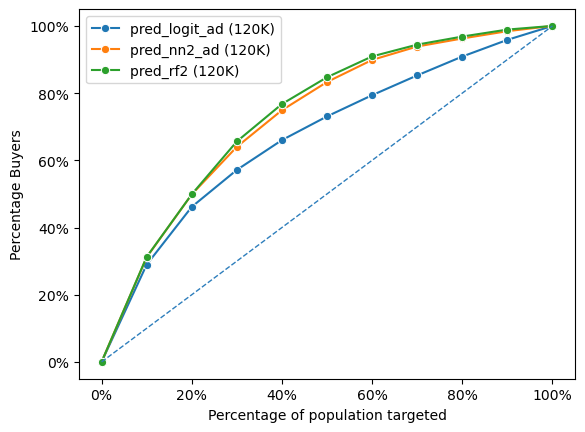

In [476]:
fig6 = rsm.gains_plot({"120K": cg_ad_treatment[cg_ad_treatment['rnd_30k'] == 0]}, "converted", "yes", ["pred_logit_ad", "pred_nn2_ad", "pred_rf2"])

This shows that Random Forest has the best performance in comparison to both Neural Network and Logistic Regression and therefore has the best ability to determine customers likely to convert. 

## Conclusion

Based on better performance in the Gains Plot, higher AUC (0.7808) and highest profit of $91,918.66, our final recommendation is the Random Forest model.

### Sklearn - Random Forest

In [478]:
cg_ad_treatment_filtered=cg_ad_treatment[cg_ad_treatment["rnd_30k"]==1]
cg_ad_treatment_filtered.shape

mapping = {'no': 0, 'yes': 1}
X_train=cg_ad_treatment_filtered[evar]
Y_train=cg_ad_treatment_filtered[["converted"]]

Y_train["converted"]=Y_train["converted"].map(mapping).astype("int")
Y_train

X_test=cg_ad_treatment[cg_ad_treatment["rnd_30k"]==0][evar]
Y_test=cg_ad_treatment[cg_ad_treatment["rnd_30k"]==0][["converted"]]
print(f"Training shapes are {X_test.shape}  {Y_test.shape}")

Y_test["converted"]=Y_test["converted"].map(mapping).astype("int")
Y_test

numeric_columns = ['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent',
       'NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'NumFriends',
       'TimesLostSpaceship', 'TimesKilled', 'TimesCaptain', 'TimesNavigator',
       'NumAdsClicked', 'DaysUser']
non_numeric_columns=['AcquiredSpaceship', 'AcquiredIonWeapon',
       'PurchasedCoinPackSmall', 'PurchasedCoinPackLarge', 'UserConsole',
       'UserHasOldOS']


# Assuming X_train, Y_train, X_test, and Y_test are already defined and preprocessed
# Also assuming 'numeric_columns' and 'non_numeric_columns' are defined

# Define the preprocessor as before
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), non_numeric_columns)
    ])

# Create RandomForestClassifier with specified hyperparameters
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    max_features=11,
    random_state=1234  # It's good practice to set a random_state for reproducibility
)

# Create a pipeline combining the preprocessor and the Random Forest classifier
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

# Fit the pipeline to the training data
rf_pipeline.fit(X_train, Y_train)

# Predict probabilities on the training set
y_pred_prob_train = rf_pipeline.predict_proba(X_train)[:, 1]

# Compute AUC for the training set
auc_score_train = roc_auc_score(Y_train, y_pred_prob_train)
print("Training AUC (Random Forest):", auc_score_train)

# Predict probabilities on the test set
y_pred_prob_test = rf_pipeline.predict_proba(X_test)[:, 1]

# Compute AUC for the test set
auc_score_test = roc_auc_score(Y_test, y_pred_prob_test)
print("Test AUC (Random Forest):", auc_score_test)

Training shapes are (120000, 19)  (120000, 1)


/tmp/ipykernel_21311/3110654106.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train["converted"]=Y_train["converted"].map(mapping).astype("int")
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training AUC (Random Forest): 0.8148495444644912
Test AUC (Random Forest): 0.7807901464563687


### Sklearn - Neural Network

numeric_columns = ['GameLevel', 'NumGameDays', 'NumGameDays4Plus', 'NumInGameMessagesSent',
       'NumSpaceHeroBadges', 'NumFriendRequestIgnored', 'NumFriends',
       'TimesLostSpaceship', 'TimesKilled', 'TimesCaptain', 'TimesNavigator',
       'NumAdsClicked', 'DaysUser']
non_numeric_columns=['AcquiredSpaceship', 'AcquiredIonWeapon',
       'PurchasedCoinPackSmall', 'PurchasedCoinPackLarge', 'UserConsole',
       'UserHasOldOS']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), non_numeric_columns)
    ])

# Create an MLPClassifier with specified hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(3,5),
    activation='tanh',
    solver='lbfgs',
    alpha=0.1,
    max_iter=10000,
    random_state=1234
)

# Create a pipeline combining the preprocessor and the MLP classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', mlp)
])

# Fit the pipeline to the training data
pipeline.fit(X_train, Y_train)

# Predict probabilities on the training set
y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]

# Compute and print the AUC score for the training set
auc_score_train = roc_auc_score(Y_train, y_pred_prob_train)
print("Training AUC:", auc_score_train)

# Predict probabilities on the test set
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Compute and print the AUC score for the test set
auc_score_test = roc_auc_score(Y_test, y_pred_prob_test)
print("Test AUC:", auc_score_test)

## Part VI: Generative AI 

We used Generative AI (Chat GPT) here for both conceptual understanding as well as code prompts. 

We used it extensively to understand the nuances of hyper parameter tuning, both for neural network and random forest. Within this, we used it to see what parameters could actually be tuned and the meaning of each hyper parameter as well as the usual acceptable range of values within it. We also entered prompts to analyze the significance of OBB see how to check how to prevent overfitting in random forests, for eg, we used it to gain a better understanding of AdaBoost.

For the code part, we used it to understand the arguments in GridSearchCv, minor pandas commands, functions and also at times help debug code and find out small errors that we were overlooking. We used it most extensively however to understand how to build random forests and neural network using sklearn.

ChatGPT Link: https://chat.openai.com/share/98b56855-450c-4b25-b2b9-2ed01d518508